# Notebook used for social planner optimization

Creation of cost curve.

In [1]:
from project.utils import make_plots
from project.model import social_planner

##### Less efficient dwelling have globaly higher cost-efficiency

--> Yet, E have higher cost-efficiency than F for consumption saved < 40%
--> Other determinants of cost-efficiency

2022-11-21 15:19:09,800 - 18913 - log_ - INFO - Creating AgentBuildings object


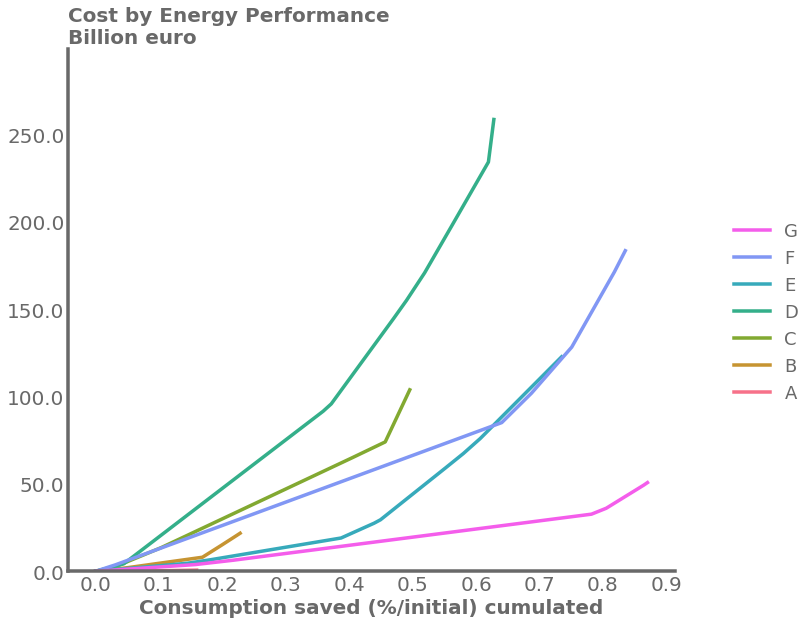

In [2]:
dict_cost, dict_heat_bis = social_planner(aggregation_archetype=['Performance'], building_stock='simple_1', freq='hour')
make_plots(dict_cost, 'Cost by Energy Performance (Billion euro)', loc='left', left=1.15)

2022-11-21 15:19:33,666 - 18913 - log_ - INFO - Creating AgentBuildings object
2022-11-21 15:19:33,666 - 18913 - log_ - INFO - Creating AgentBuildings object


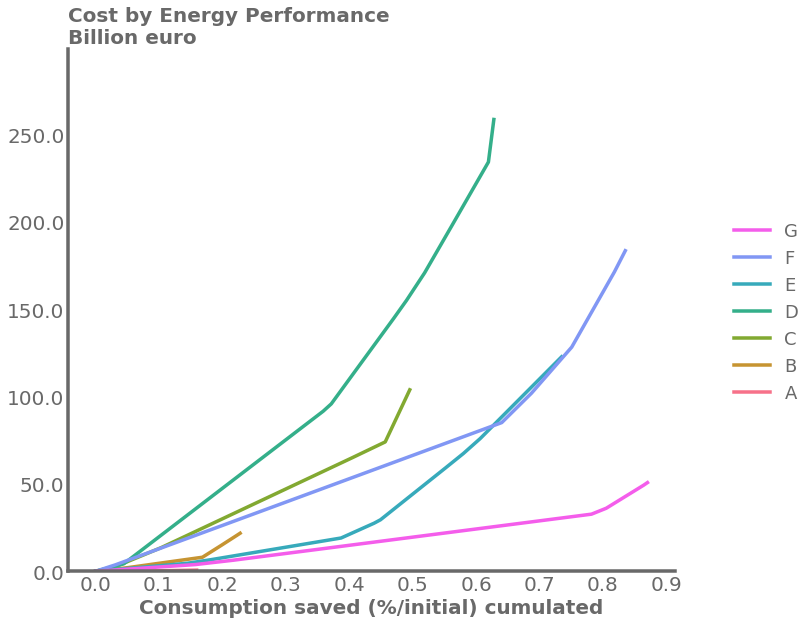

In [4]:
dict_cost, dict_heat = social_planner(aggregation_archetype=['Performance'], building_stock='simple_1')
make_plots(dict_cost, 'Cost by Energy Performance (Billion euro)', loc='left', left=1.15)

In [ ]:
dict_cost, _ = social_planner(aggregation_archetype=['Performance'], building_stock='simple_1')
make_plots(dict_cost, 'Cost by Energy Performance (Billion euro)', loc='left', left=1.15)

##### Energy is a key for

In [ ]:
dict_cost, _ = social_planner(aggregation_archetype=['Energy'])
make_plots(dict_cost, 'Cost by Energy Performance (Billion euro)', loc='left', left=1.15)

In [ ]:
dict_cost, _ = social_planner(aggregation_archetype=['Housing type'])
make_plots(dict_cost, 'Cost by Housing type (Billion euro)', loc='left', left=1.15)



dict_cost, _ = social_planner(aggregation_archetype=['Energy'])
make_plots(dict_cost, 'Cost by Energy Performance (Billion euro)', loc='left', left=1.15)

In [ ]:
dict_cost, _ = social_planner(aggregation_archetype=['Performance', 'Energy'])
make_plots({k: item for k, item in dict_cost.items() if 'D' in k}, 'Cost by Energy Performance (Billion euro)', loc='left', left=1.15)

In [ ]:
dict_cost, dict_heat = social_planner(aggregation_archetype=['Housing type', 'Performance'])
make_plots({k: item for k, item in dict_cost.items() if 'Single-family' in k}, 'Cost (Billion euro)', loc='left', left=1.15)
make_plots({k: item for k, item in dict_cost.items() if 'Multi-family' in k}, 'Cost (Billion euro)', loc='left', left=1.15)

In [ ]:
stocks = ['project/input/stock/buildingstock_sdes2018_medium_{}.csv'.format(i) for i in [1, 3, 5]]
stocks += ['project/input/stock/buildingstock_sdes2018_simple_{}.csv'.format(i) for i in [1, 3, 5]]

data = {}
k = 0
for path in stocks:
    df = cost_curve(path=path)
    data[k] = df
    k += 1